In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("scrapped_data.csv")
df

,userName,score,at,content
0,Rully Pohan,1,2022-11-04 12:04:57,"kiosk matic gak berfungsi, order bright gas ga..."
1,Novitriyani Sekarjati,1,2022-11-04 07:48:52,Ga niat bikin app kah? I spent an hour at spbu...
2,Lucky Jaya,3,2022-11-03 23:56:43,"ngga bisa login, lucu yaa 🤣🤣"
3,Nanang Fauzi,1,2022-11-03 15:45:38,"Saya sudah daftar untuk mobil pribadi, meskipu..."
4,Azzar Hanif,1,2022-11-03 06:39:27,Sering error
...,...,...,...,...
22770,A Google user,5,2017-09-23 03:52:49,"Bagus, mau dong kontak developernya"
22771,A Google user,1,2017-09-21 21:58:04,Tidak ada informasi kalau tidak login sementar...
22772,A Google user,5,2017-08-14 15:38:15,cool app
22773,A Google user,5,2017-08-10 22:37:18,Daebak !!! sukaaaaakk banget 😁


In [4]:
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df1 = df[df['at'].dt.strftime('%Y-%m') >= '2022-09']

In [5]:
df1

,userName,score,at,content
0,Rully Pohan,1,2022-11-04 12:04:57,"kiosk matic gak berfungsi, order bright gas ga..."
1,Novitriyani Sekarjati,1,2022-11-04 07:48:52,Ga niat bikin app kah? I spent an hour at spbu...
2,Lucky Jaya,3,2022-11-03 23:56:43,"ngga bisa login, lucu yaa 🤣🤣"
3,Nanang Fauzi,1,2022-11-03 15:45:38,"Saya sudah daftar untuk mobil pribadi, meskipu..."
4,Azzar Hanif,1,2022-11-03 06:39:27,Sering error
...,...,...,...,...
864,Noery Mutiarahim 2,1,2022-09-01 01:24:21,Stupid application!
865,Luky,1,2022-09-01 00:56:39,Tidak bs didownload aplikasinya (pending)
866,Ojan Gaming,1,2022-09-01 00:29:17,Ruwed wa
867,Arfini Dewanty,1,2022-09-01 00:19:22,Gak bisa daftar. Kode OTP gak masuk di sms. Su...


In [6]:
total_polaritas = 0
total_ulasan = []

for ulasan in df1["content"] : 
    try:

        print(ulasan)

        analisis = TextBlob(ulasan)
        an = analisis.translate(from_lang="id", to="en")

        total_polaritas += an.polarity
        total_ulasan.append([ulasan, an.polarity, an.subjectivity])

        print(an.sentiment, "\n")

    except Exception as e:
        print("Upzie!")

kiosk matic gak berfungsi, order bright gas gak bisa, banyak fitur yg gak berfungsi
Sentiment(polarity=0.6000000000000001, subjectivity=0.6499999999999999) 

Ga niat bikin app kah? I spent an hour at spbu, karena link aja ga bisa konek setelah sebelumnya terhubung. Sekarang spbu ga terima pembayaran link aja karena mereka bilang suka error, sedangkan pembayaran dengan my pertamina bagi pelanggan, di mana aplikasi my pertamina lebih sering error itu lebih merugikan dan sangat tidak ramah pembayaran dengan e-wallet/e-money.
Sentiment(polarity=0.18666666666666668, subjectivity=0.31333333333333335) 

ngga bisa login, lucu yaa 🤣🤣
Sentiment(polarity=0.25, subjectivity=1.0) 

Saya sudah daftar untuk mobil pribadi, meskipun harus upload foto kendaraan dan STNK berulang kali hingga akhirnya bisa di approve. Kemudian saya menambahkan data kendaraan operasional kantor, begitu saya update datanya, data kendaraan pribadi ikut terupdate dan menunggu verifikasi ulang, beberapa hari kemudian dapat not

In [7]:
df1.to_csv("clean_data.csv", index = False)  #Save the file as CSV

In [8]:
clean_df = pd.DataFrame(total_ulasan, columns=['Ulasan', 'Polaritas', 'Subjektivitas'])

In [9]:
clean_df

,Ulasan,Polaritas,Subjektivitas
0,"kiosk matic gak berfungsi, order bright gas ga...",0.600000,0.650000
1,Ga niat bikin app kah? I spent an hour at spbu...,0.186667,0.313333
2,"ngga bisa login, lucu yaa 🤣🤣",0.250000,1.000000
3,"Saya sudah daftar untuk mobil pribadi, meskipu...",-0.155404,0.408333
4,Sering error,0.000000,0.000000
...,...,...,...
788,"gabisa daftar subsidi tepat, katanya gangguan ...",0.285714,0.535714
789,Stupid application!,-1.000000,1.000000
790,Tidak bs didownload aplikasinya (pending),0.000000,0.000000
791,Gak bisa daftar. Kode OTP gak masuk di sms. Su...,-0.050000,0.400000


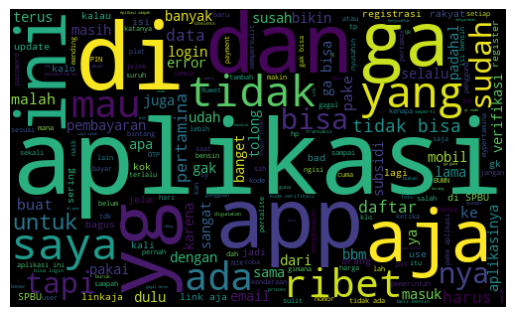

In [10]:
allWord = ' '.join([rev for rev in clean_df['Ulasan']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
def getAnalysis(score):
    if score < 0 :
        return "Negatif"
    elif score == 0 :
        return "Netral"
    else :
        return "Positif"

clean_df["Analisis"] = clean_df["Polaritas"].apply(getAnalysis)

clean_df

,Ulasan,Polaritas,Subjektivitas,Analisis
0,"kiosk matic gak berfungsi, order bright gas ga...",0.600000,0.650000,Positif
1,Ga niat bikin app kah? I spent an hour at spbu...,0.186667,0.313333,Positif
2,"ngga bisa login, lucu yaa 🤣🤣",0.250000,1.000000,Positif
3,"Saya sudah daftar untuk mobil pribadi, meskipu...",-0.155404,0.408333,Negatif
4,Sering error,0.000000,0.000000,Netral
...,...,...,...,...
788,"gabisa daftar subsidi tepat, katanya gangguan ...",0.285714,0.535714,Positif
789,Stupid application!,-1.000000,1.000000,Negatif
790,Tidak bs didownload aplikasinya (pending),0.000000,0.000000,Netral
791,Gak bisa daftar. Kode OTP gak masuk di sms. Su...,-0.050000,0.400000,Negatif


In [12]:
plt.style.use('fivethirtyeight')

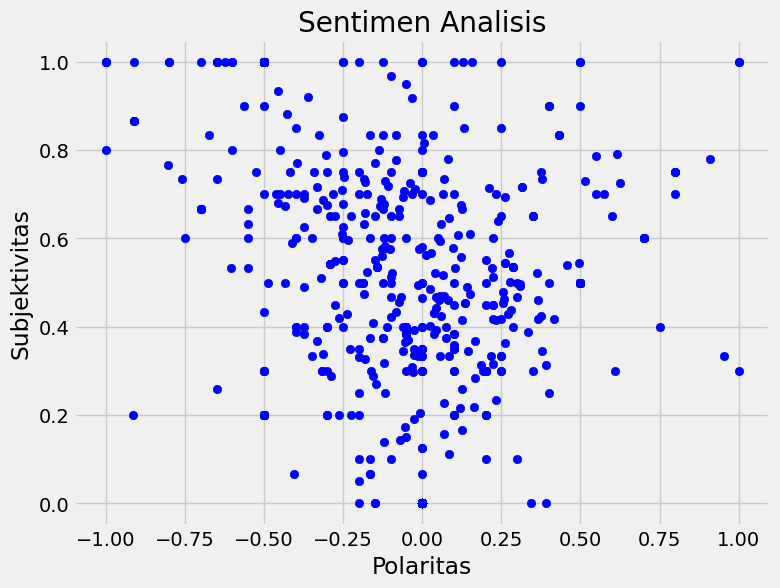

In [13]:
plt.figure(figsize=(8,6))
for i in range(0, clean_df.shape[0]):
    plt.scatter(clean_df['Polaritas'][i], clean_df['Subjektivitas'][i], color='Blue')

plt.title('Sentimen Analisis')
plt.xlabel('Polaritas')
plt.ylabel('Subjektivitas')
plt.show()

In [14]:
nreview = clean_df[clean_df.Analisis == "Negatif"]
nreview = nreview['Ulasan']

round((nreview.shape[0] / clean_df.shape[0] * 100), 1)

41.0

In [15]:
ntreview = clean_df[clean_df.Analisis == "Netral"]
ntreview = ntreview['Ulasan']

round((ntreview.shape[0] / clean_df.shape[0] * 100), 1)

31.8

In [16]:
preview = clean_df[clean_df.Analisis == "Positif"]
preview = preview['Ulasan']

round((preview.shape[0] / clean_df.shape[0] * 100), 1)

27.2

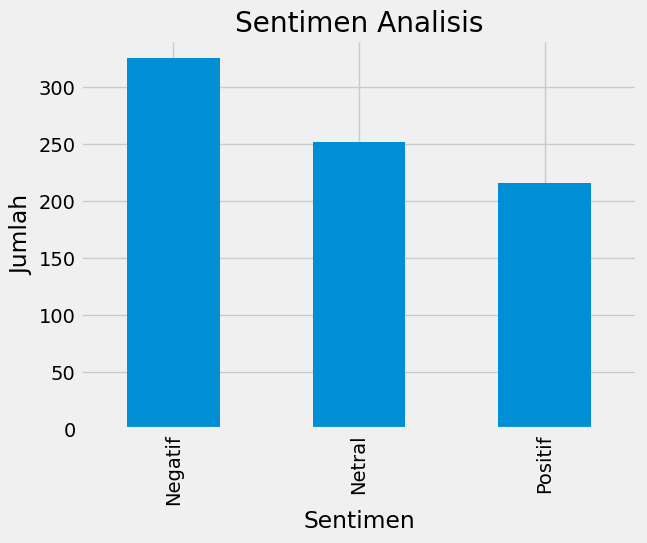

In [17]:
clean_df['Analisis'].value_counts()

plt.title('Sentimen Analisis')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

clean_df['Analisis'].value_counts().plot(kind='bar')
plt.show()

In [18]:
clean_df

,Ulasan,Polaritas,Subjektivitas,Analisis
0,"kiosk matic gak berfungsi, order bright gas ga...",0.600000,0.650000,Positif
1,Ga niat bikin app kah? I spent an hour at spbu...,0.186667,0.313333,Positif
2,"ngga bisa login, lucu yaa 🤣🤣",0.250000,1.000000,Positif
3,"Saya sudah daftar untuk mobil pribadi, meskipu...",-0.155404,0.408333,Negatif
4,Sering error,0.000000,0.000000,Netral
...,...,...,...,...
788,"gabisa daftar subsidi tepat, katanya gangguan ...",0.285714,0.535714,Positif
789,Stupid application!,-1.000000,1.000000,Negatif
790,Tidak bs didownload aplikasinya (pending),0.000000,0.000000,Netral
791,Gak bisa daftar. Kode OTP gak masuk di sms. Su...,-0.050000,0.400000,Negatif


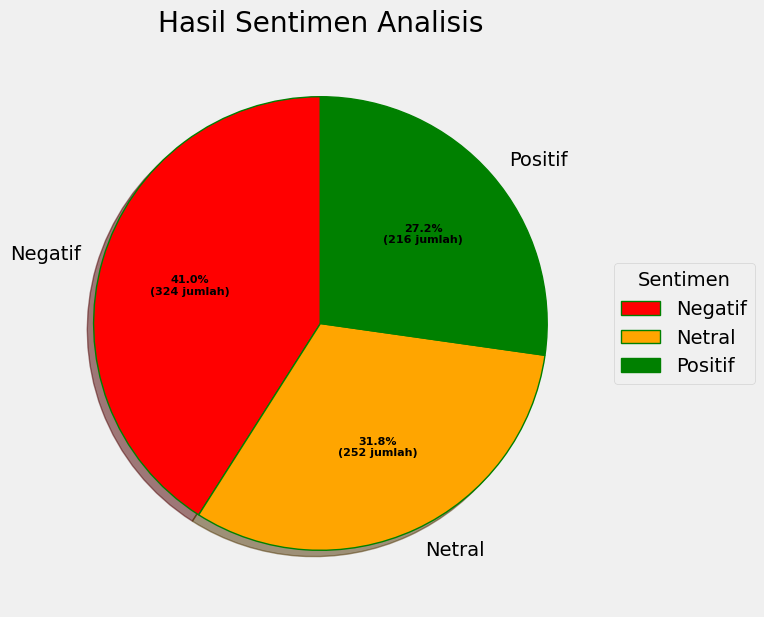

In [19]:
# Creating color parameters
colors = ( "red", "orange", "green")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

label_analisis = ['Negatif', 'Netral', 'Positif']
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} jumlah)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(clean_df['Analisis'].value_counts(),
                                  autopct = lambda pct: func(pct, clean_df['Analisis'].value_counts()),
                                  labels = label_analisis,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, label_analisis,
          title ="Sentimen",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Hasil Sentimen Analisis")
 
# show plot
plt.show()

In [20]:
clean_df.to_csv("fixed_data.csv", index = False)  #Save the file as CSV